# Reference automated single-cell cell type annotation

By 2025, algorithms for automated cell type annotation have proliferated. Omicverse is committed to reducing discrepancies between different algorithms, so we categorize automated annotation methods into two groups: `with single-cell reference` and `without single-cell reference`. Each category has its own advantages and disadvantages. In this tutorial, we will only cover usage and will not compare different algorithms.

This chapter focuses on `single-cell reference` approaches, meaning cell type annotation can be performed with downloading existing single-cell datasets.

In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set(font_path='Arial')

# Enable auto-reload for development
%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf


/home/groups/xiaojie/steorra/env/omicverse/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


Registered as: Arial
🧬 Detecting GPU devices…
✅ NVIDIA CUDA GPUs detected: 1
    • [CUDA 0] NVIDIA H100 80GB HBM3
      Memory: 79.1 GB | Compute: 9.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.8rc2   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



## Data preprocess

### Load Query Dataset

To quickly demonstrate our capability for reference-free cell type annotation, we utilize the classic pbmc3k dataset. You can import it directly using `omicverse.datasets.pbmc3k` or download it via the link: https://falexwolf.de/data/pbmc3k_raw.h5ad.

In [3]:
adata=ov.datasets.pbmc3k()
adata

 Loading PBMC 3k dataset (raw)
🔍 Downloading data to ./data/pbmc3k_raw.h5ad
⚠️ File ./data/pbmc3k_raw.h5ad already exists
 Loading data from ./data/pbmc3k_raw.h5ad
✅ Successfully loaded: 2700 cells × 32738 genes


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

Unlike cases without reference annotation, when working with single-cell reference annotation, we need to use raw counts to integrate reference datasets. If your data has already undergone `log1p` and `normalize` processing, you can also use `omicverse.pp.recover_counts` to restore it to raw counts.

### Load Ref Dataset

In theory, we can use any annotated single-cell dataset as a reference. For beginners, finding a suitable reference single-cell dataset can be quite challenging. Therefore, we recommend using cellxgene to obtain pre-annotated single-cell data. To simplify the process, we've added an Agent feature that automatically identifies the most suitable single-cell dataset.

In [3]:
obj=ov.single.Annotation(adata)
res=obj.query_reference(
    source='cellxgene',
    data_desc='PBMC for human',
    llm_model='gpt-5-mini',
    llm_api_key='sk-*',
    llm_provider='openai',
    llm_base_url='https://api.openai.com/v1',
)

正在访问 API: https://api.cellxgene.cziscience.com/curation/v1/collections
✓ API 访问成功 (状态码: 200)
CellxGene description dataframe saved to self.cellxgene_desc_df
✓ LLM-selected CellxGene collections:
  - dde06e0f-ab3b-46be-96a2-a8082383c4a1: Single-cell eQTL mapping identifies cell type specific genetic control of autoimmune disease (https://cellxgene.cziscience.com/collections/dde06e0f-ab3b-46be-96a2-a8082383c4a1)
  - ced320a1-29f3-47c1-a735-513c7084d508: Asian Immune Diversity Atlas (AIDA) (https://cellxgene.cziscience.com/collections/ced320a1-29f3-47c1-a735-513c7084d508)
  - e9360edf-b0b7-4e01-bce8-e596814f13e7: Multi-omic profiling reveals age-related immune dynamics in healthy adults (https://cellxgene.cziscience.com/collections/e9360edf-b0b7-4e01-bce8-e596814f13e7)
  - 4a9fd4d7-d870-4265-89a5-ad51ab811d89: ScaleBio Single Cell RNA Sequencing of Human PBMCs (https://cellxgene.cziscience.com/collections/4a9fd4d7-d870-4265-89a5-ad51ab811d89)
  - 436154da-bcf1-4130-9c8b-120ff9a888f2: Sing

In [4]:
res.head()

,collection_id,collection_url,name,description,llm_reason
0,dde06e0f-ab3b-46be-96a2-a8082383c4a1,https://cellxgene.cziscience.com/collections/d...,Single-cell eQTL mapping identifies cell type ...,The human immune system displays remarkable va...,Large-scale peripheral blood / PBMC resource (...
1,ced320a1-29f3-47c1-a735-513c7084d508,https://cellxgene.cziscience.com/collections/c...,Asian Immune Diversity Atlas (AIDA),The relationships of human diversity with biom...,Asian Immune Diversity Atlas: multi-donor circ...
2,e9360edf-b0b7-4e01-bce8-e596814f13e7,https://cellxgene.cziscience.com/collections/e...,Multi-omic profiling reveals age-related immun...,The generation and maintenance of immunity is ...,Multi-omic profiling of peripheral immunity in...
3,4a9fd4d7-d870-4265-89a5-ad51ab811d89,https://cellxgene.cziscience.com/collections/4...,ScaleBio Single Cell RNA Sequencing of Human P...,In an effort to increase throughput and reduce...,ScaleBio Single Cell RNA Sequencing of Human P...
4,436154da-bcf1-4130-9c8b-120ff9a888f2,https://cellxgene.cziscience.com/collections/4...,Single-cell RNA-seq reveals the cell-type-spec...,Systemic lupus erythematosus (SLE) is a hetero...,Large PBMC cohort (systemic lupus study) with ...


For the `PBMC for human` dataset, the most suitable single-cell data download link is: Single-cell eQTL mapping identifies cell type specific genetic control of autoimmune disease (https://cellxgene.cziscience.com/collections/dde06e0f-ab3b-46be-96a2-a8082383c4a1)

However, for the sake of a quick demonstration in this tutorial, we won't select this dataset. Instead, we'll choose a smaller dataset for reference. Such as: Single-cell atlas of peripheral immune response to SARS-CoV-2 infection (https://cellxgene.cziscience.com/collections/a72afd53-ab92-4511-88da-252fb0e26b9a)


In [11]:
ov.datasets.download_data_requests(
    url='https://datasets.cellxgene.cziscience.com/89c999bd-2ba9-4281-9d22-4261347c5c78.h5ad',
    file_path='pbmc_ref_cellxgene_test1.h5ad', 
    dir='./data'
)

🔍 Downloading data to ./data/pbmc_ref_cellxgene_test1.h5ad...


Downloading: 100%|██████████| 217M/217M [00:05<00:00, 39.8MB/s] 

✅ Download completed


'./data/pbmc_ref_cellxgene_test1.h5ad'

In [4]:
adata_ref=ov.read(
    'data/pbmc_ref_cellxgene_test1.h5ad'
)
adata_ref

AnnData object with n_obs × n_vars = 44721 × 24505
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rps', 'percent.rpl', 'percent.rrna', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'singler', 'cell.type.fine', 'cell.type.coarse', 'IFN1', 'HLA1', 'donor_id', 'DPS', 'DTF', 'Admission', 'Ventilated', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [5]:
print(adata_ref.X.max(),adata_ref.X.max()<ov.np.log1p(1e4))

7.449498 True


<div class="admonition warning">
  <p class="admonition-title">Note</p>
  <p>
    We found that the counts in this dataset are not integers, and the maximum value does not exceed log1p(1e4). This means we need to restore the original counts before performing the integration.
  </p>
</div>

In [6]:
X_counts_recovered, size_factors_sub=ov.pp.recover_counts(adata_ref.X, 1e4, 1e5, log_base=None, 
                                                          chunk_size=10000)
adata_ref.layers['counts']=X_counts_recovered
adata_ref.X=adata_ref.layers['counts'].copy()






00%|██████████| 4721/4721 [00:05<00:00, 819.73it/s]]

In [7]:
print(adata_ref.X.max(),adata_ref.X.max()<ov.np.log1p(1e4))

1718 False


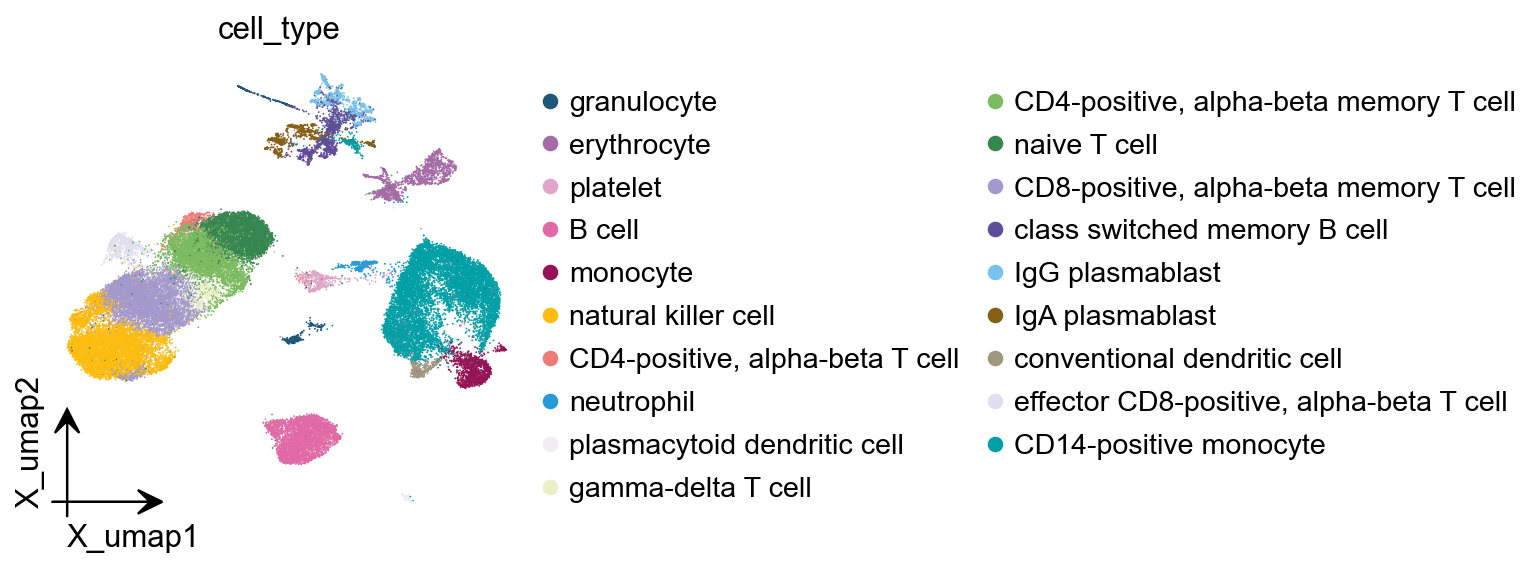

In [19]:
ov.pl.embedding(
    adata_ref,
    basis='X_umap',
    color='cell_type'
)

In [21]:
adata_ref.var.head()

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000235399,False,ENSG00000235399,NCBITaxon:9606,gene,524,lncRNA
ENSG00000151338,False,MIPOL1,NCBITaxon:9606,gene,2191,protein_coding
ENSG00000182173,False,TSEN54,NCBITaxon:9606,gene,2036,protein_coding
ENSG00000148297,False,MED22,NCBITaxon:9606,gene,933,protein_coding
ENSG00000269997,False,ENSG00000269997,NCBITaxon:9606,gene,553,lncRNA


In [8]:
adata_ref.var.index=adata_ref.var['feature_name'].tolist()

<div class="admonition warning">
  <p class="admonition-title">Note</p>
  <p>
    We need to unified the gene names between this two different datasets.
  </p>
</div>

## Automated Annotation

We have unified all automatic annotation algorithms into the `omicverse.single.AnnotationRef` class.

In [9]:
adata.var_names_make_unique()
adata_ref.var_names_make_unique()

adata.obs_names_make_unique()
adata_ref.obs_names_make_unique()

In [10]:
objref=ov.single.AnnotationRef(
    adata_query=adata,
    adata_ref=adata_ref,
    celltype_key='cell_type'
)

Concatenated adata saved to self.adata_new


In [11]:
objref.preprocess(
    mode='shiftlog|pearson',
    n_HVGs=3000,
    batch_key='integrate_batch'
)

🔍 [2025-11-03 15:13:41] Running preprocessing in 'cpu' mode...
Begin robust gene identification
    After filtration, 16801/16801 genes are kept.
    Among 16801 genes, 14976 genes are robust.
✅ Robust gene identification completed successfully.
Begin size normalization: shiftlog and HVGs selection pearson

🔍 Count Normalization:
   Target sum: 500000.0
   Exclude highly expressed: True
   Max fraction threshold: 0.2
   ⚠️ Excluding 5 highly-expressed genes from normalization computation
   Excluded genes: ['HBA2', 'DEFA1B', 'HBG1', 'HBB', 'MALAT1']

✅ Count Normalization Completed Successfully!
   ✓ Processed: 47,421 cells × 14,976 genes
   ✓ Runtime: 3.70s

🔍 Highly Variable Genes Selection (Experimental):
   Method: pearson_residuals
   Target genes: 3,000
   Batch key: integrate_batch
   Theta (overdispersion): 100

✅ Experimental HVG Selection Completed Successfully!
   ✓ Selected: 3,000 highly variable genes out of 14,976 total (20.0%)
   ✓ Results added to AnnData object:
     •

### K-nearest neighbor classification after dataset integration with Harmony

In [12]:
objref.train(
    method='harmony',
    n_pcs=50
)

...Begin using harmony to correct batch effect

Using CUDA device: NVIDIA H100 80GB HBM3
✅ TorchDR available for GPU-accelerated PCA
   Omicverse mode: cpu
   Detected device: cuda
🖥️ Using PyTorch CPU acceleration for Harmony
🔍 [2025-11-03 15:14:42] Running Harmony integration...
    Max iterations: 10
    Convergence threshold: 0.0001



armony converged after 6 iterations:  50%|█████     | 5/10 [00:05<00:05,  1.04s/it]

✅ Harmony converged after 6 iterations
Harmony integrated embeddings saved to self.adata_query.obsm['X_pca_harmony'] and self.adata_ref.obsm['X_pca_harmony']


AnnData object with n_obs × n_vars = 2700 × 16801
    var: 'gene_ids'
    obsm: 'X_pca_harmony_anno'

In [13]:
ad_pre=objref.predict(
    method='harmony',
    n_neighbors=15,
)

Weighted KNN with n_neighbors = 15 ... finished!
harmony_prediction saved to adata.obs['harmony_prediction']
harmony_uncertainty saved to adata.obs['harmony_uncertainty']


In [14]:
ov.pp.mde(
    ad_pre,use_rep='X_pca_harmony_anno'
)

🔍 MDE Dimensionality Reduction:
   Mode: cpu
   Embedding dimensions: 2
   Neighbors: 15
   Repulsive fraction: 0.7
   Using representation: X_pca_harmony_anno
   Principal components: 50

Using CUDA device: NVIDIA H100 80GB HBM3
✅ TorchDR available for GPU-accelerated PCA
   🔍 Computing k-nearest neighbors graph...
   🔍 Creating MDE embedding...
   🔍 Optimizing embedding...


✅ MDE Dimensionality Reduction Completed Successfully!
   ✓ Embedding shape: 2,700 cells × 2 dimensions
   ✓ Runtime: 2.32s
   ✓ Results added to AnnData object:
     • 'X_mde': MDE coordinates (adata.obsm)
     • 'neighbors': Neighbors metadata (adata.uns)
     • 'distances': Distance matrix (adata.obsp)
     • 'connectivities': Connectivity matrix (adata.obsp)


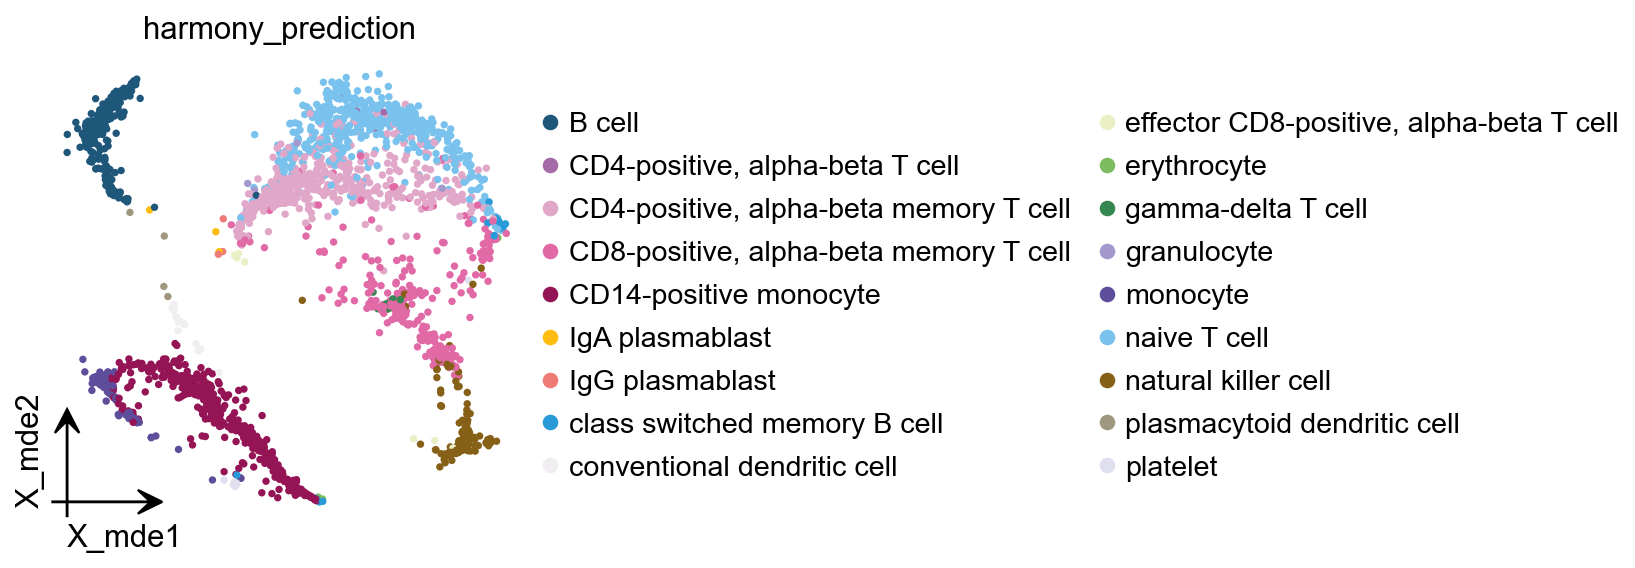

In [15]:
ov.pl.embedding(
    ad_pre,
    basis='X_mde',
    color='harmony_prediction'
)

In [16]:
ad_pre.obs['harmony_uncertainty']=ad_pre.obs['harmony_uncertainty'].astype(float)

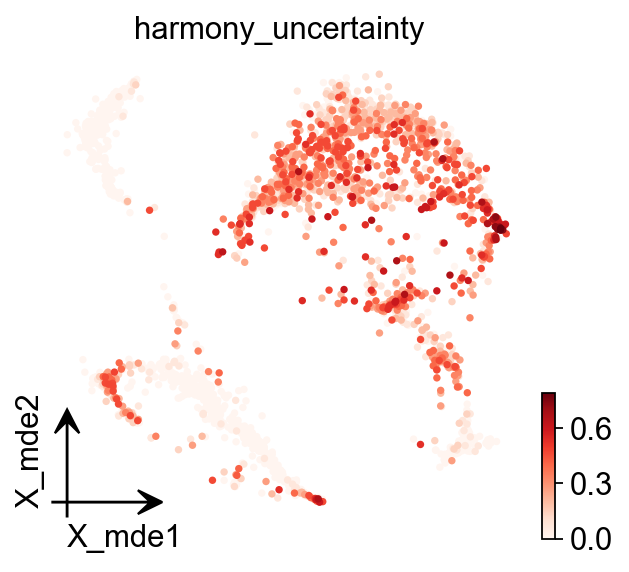

In [17]:
ov.pl.embedding(
    ad_pre,
    basis='X_mde',
    color='harmony_uncertainty',
    cmap='Reds'
)

### K-nearest neighbor classification after dataset integration with scVI

In [18]:
objref.train(
    method='scVI',
    n_layers=2, n_latent=30, gene_likelihood="nb"
)

...Begin using scVI to correct batch effect


INFO: GPU available: True (cuda), used: True


INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True


INFO: TPU available: False, using: 0 TPU cores


INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores


INFO: HPU available: False, using: 0 HPUs


INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO: You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/169 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=169` reached.


INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=169` reached.
scVI integrated embeddings saved to self.adata_query.obsm['X_scVI'] and self.adata_ref.obsm['X_scVI']


AnnData object with n_obs × n_vars = 2700 × 16801
    obs: 'harmony_prediction', 'harmony_uncertainty'
    var: 'gene_ids'
    uns: 'neighbors', 'REFERENCE_MANU', 'harmony_prediction_colors_rgba', 'harmony_prediction_colors'
    obsm: 'X_pca_harmony_anno', 'X_mde', 'X_scVI_anno'
    obsp: 'distances', 'connectivities'

In [19]:
ad_pre1=objref.predict(
    method='scVI',
    n_neighbors=15,
)

Weighted KNN with n_neighbors = 15 ... finished!
scVI_prediction saved to adata.obs['scVI_prediction']
scVI_uncertainty saved to adata.obs['scVI_uncertainty']


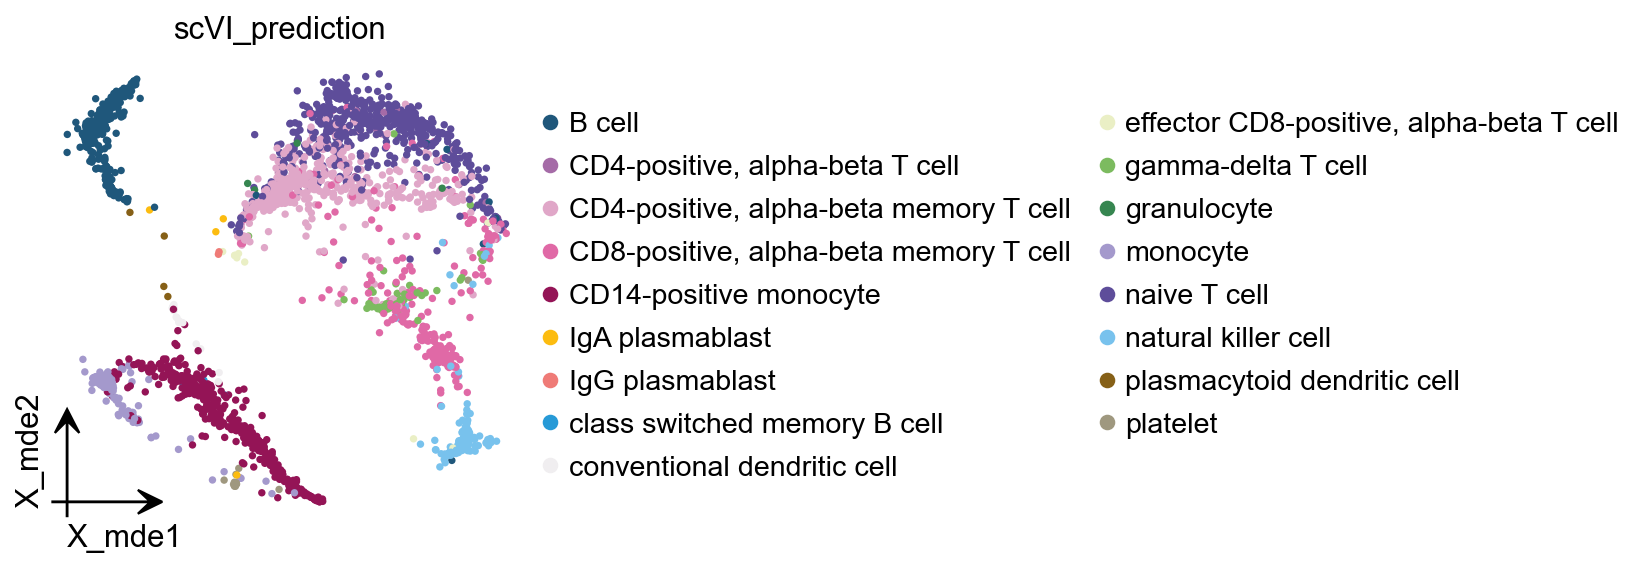

In [21]:
ov.pl.embedding(
    ad_pre1,
    basis='X_mde',
    color='scVI_prediction'
)

In [22]:
ad_pre1.obs['scVI_uncertainty']=ad_pre1.obs['scVI_uncertainty'].astype(float)

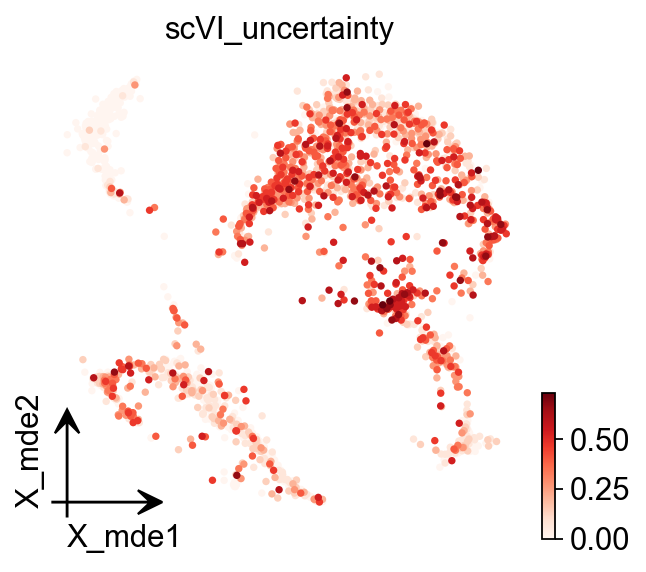

In [23]:
ov.pl.embedding(
    ad_pre1,
    basis='X_mde',
    color='scVI_uncertainty',
    cmap='Reds'
)

In [24]:
ad_pre.write('result/knn_anno1.h5ad')